# End-to-end `scivision` pipeline for a pretrained/prebuilt model for plankton classification

This notebook demonstrates `scivision` to load a pretrained `ResNet50` model suited to predict plankton species from images captured by Plantkon Image.
Further details of the challenge can be found in [the original model repository](https://github.com/alan-turing-institute/plankton-dsg-challenge).

The code of this notebook let `scivision` to fetch input data from:
TODO (current version using a toy xarray dataset)

and load the pretrained `detectreeRGB` from:
https://github.com/alan-turing-institute/plankton-cefas-scivision

## Install libraries

In [1]:
!pip -q install scivision

## Load libraries

In [2]:
from scivision.io import load_pretrained_model
import numpy as np
import xarray as xr

## Model

In [3]:
# Load model
scivision_yml = 'https://github.com/alan-turing-institute/plankton-cefas-scivision/.scivision-config.yaml'
model = load_pretrained_model(scivision_yml, allow_install=True)

In [4]:
# let's explore the model object
model

scivision.PretrainedModel( 
  module='resnet50_cefas', 
  model='resnet50', 
  source='https://github.com/alan-turing-institute/plankton-cefas-scivision' 
  pipe='DataPipe(input=<Parameter "X: numpy.ndarray">, output=<Parameter "image: numpy.ndarray">)' 
)

## Data

In [5]:
# recreate plankton Xarray Dataset
N = 15

image = np.random.randint(255, size=(900, 800, 3), dtype=np.uint8)

ds = np.array([image] * N)

ds = xr.DataArray(ds, dims=['concat_dim','y', 'x', 'channel'],
                        coords={'concat_dim':  np.arange(ds.shape[0]),
                                'y': np.arange(ds.shape[1]),
                                'x': np.arange(ds.shape[2]),
                                'channel': np.arange(ds.shape[3])})

ds = ds.to_dataset(name='raster')

ds = ds.assign(
    image_width = np.random.randint(500, 600),
    image_length = np.random.randint(500, 600)
)

## Prediction and visualisation

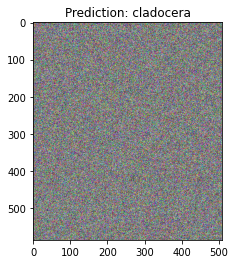

In [6]:
y = model.predict(ds, batch_size=3)